<a href="https://colab.research.google.com/github/HARDIK218/Projects/blob/main/ARIMA(ds)Airline_pasenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
df = pd.read_csv('/content/air line data.zip')

In [7]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [8]:
#for plotting we need to convert object type to date time format

In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

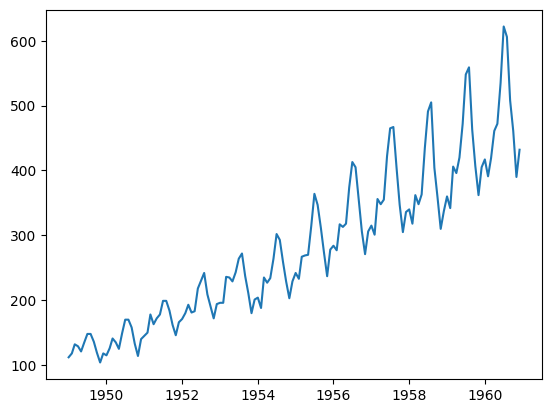

In [12]:
plt.plot(df['#Passengers'])

In [13]:
#test for checking if my data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['#Passengers'],model='additive')

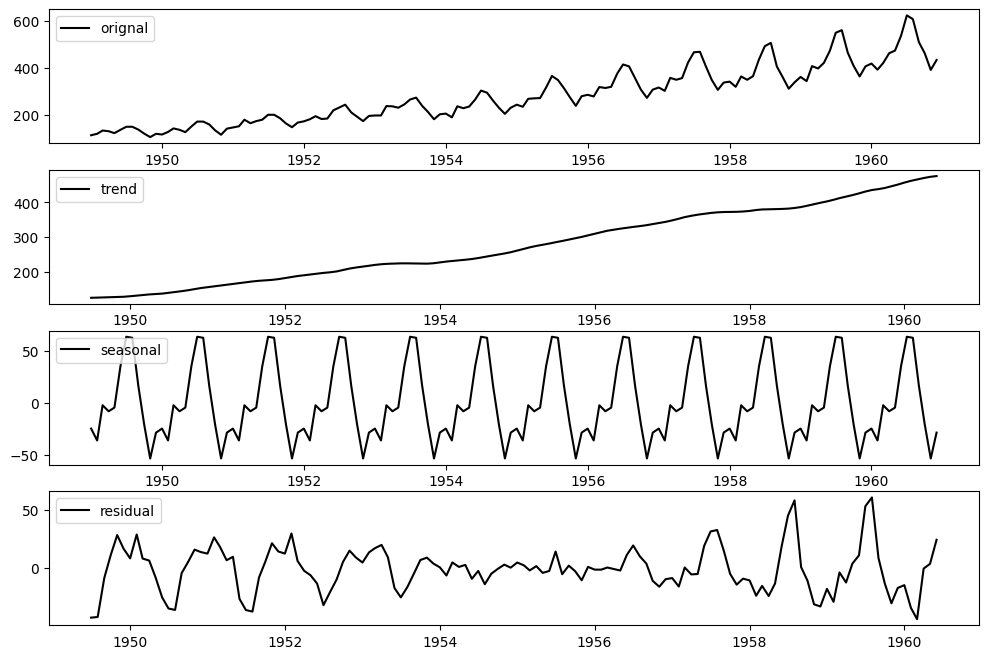

In [23]:
#as it is not stationary so we will use sarima instead of arima

#extract and plot trend,seasonal and residual
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df,label='orignal',color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='black')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='seasonal',color='black')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='residual',color='black')
plt.legend(loc='upper left')

In [29]:
  #using auto arima
  #p- autoregressive terms
  #q-moving average terms
  #d-non seasonal diffrence
  #p,q,d represents non-seasonal components
  #P,Q,D represents seasonal trend
from pmdarima.arima import auto_arima

arima_model = auto_arima(df['#Passengers'],start_p = 1,d=1,start_q = 1,max_p = 5,max_q=5,max_d=5,m=12,
                         start_P = 0,D=1,start_Q=0,max_P = 5,max_D=5,max_Q=5,
                         seasonal= True,
                         trace=True,
                         error_action = 'ignore',
                         suppress_warnings=True,stepwise = True,n_fits=10)
print(arima_model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.41 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.37 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [30]:
#SARIMAX(0, 1, 1)x(2, 1, [], 12)  this is the suggested model
#we cannot randomly split the data as order is important in time series forcasting

In [31]:
size = int(len(df)*0.66)
x_train,x_test = df[0:size],df[size:len(df)]

In [32]:
#fit sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(x_train['#Passengers'],order = (0,1,1),
                        seasonal_order = (2,1,1,12))

result = model.fit()
result.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Mon, 27 Nov 2023   AIC                            610.537
Time:                                    18:27:03   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3201      0.103     -3.115      0.002      -0.522      -0.119
ar.S.L12       0.6847      0.613      1.116      0.264      -0.517       1.887
ar.S.L24       0.3142      0.127      2.476      0.013       0.066       0.563
ma.S.L12      -0.9812      5.504     -0.178      0.859     -11.769       9.806
sigma2        78.6460    384.747      0.204      0.838    -675.444     832.736
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

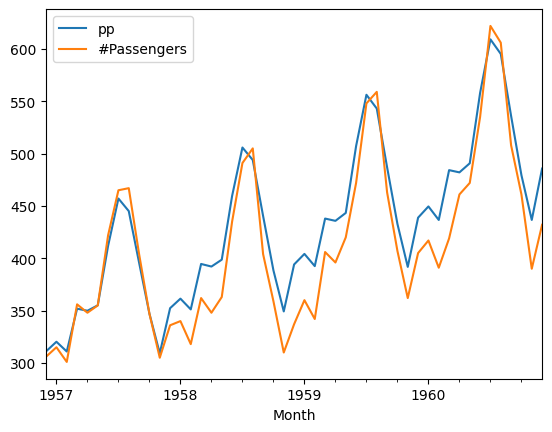

In [34]:
#train prediction
start_index = 0
end_index=len(x_train) - 1
train_prediction =result.predict(start_index,end_index)

#prdiction
start_index = len(x_train)
end_index = len(df)-1
prediction = result = result = result.predict(start_index,end_index).rename('pp')

#plot
prediction.plot(legend=True)
x_test['#Passengers'].plot(legend = True)

In [38]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(x_train, train_prediction))
print('Train Score: {:.2f}'.format(trainScore))

testScore = math.sqrt(mean_squared_error(x_test, prediction))
print('Test Score: {:.2f}'.format(testScore))


Train Score: 16.14
Test Score: 29.49
